In [14]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

CONSUMER_KEY = 'vTheftU2Gq3qWME2OfsezkHyt'
CONSUMER_SECRET = 'IJb2gfFEGAiILtC80NeZzBH8D307zSgZoN5zhrjPa0hIM8im6u'
ACCESS_TOKEN = '2473949383-GGx0tf85vbu0vM0sxcZOLMXwxo3Sn89OclXhSD8'
ACCESS_SECRET = '5SFQAcVe947aIqRfYKsYtQ2WHEKJcYQfsEkt136slML10'


def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

extractor = twitter_setup()


# input for term to be searched and how many tweets to search
#searchTerm = input("Enter Keyword/Tag to search about: ")
#NoOfTerms = int(input("Enter how many tweets to search: "))

# searching for tweets
#tweets = tweepy.Cursor(extractor.search, q=searchTerm, lang = "English").items(NoOfTerms)

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="S Abishek", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets:
    print(tweet.text)
    print()

# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

print(dir(tweets[0]))

print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

# Display of first 10 elements from dataframe:
display(data.head(10))

# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])


Number of tweets extracted: 14.

5 recent tweets:

RT @subashjayakuma1: #ValentinesDay , teaser of Vennilave Vennilave.....

https://t.co/HcVhKVedyB

Bacardi official teaser😎 

https://t.co/2VoMtL09am

Share and Support!!💪🔥

#Mersal everywhere 😍

RT @actorvijay: #Mersal 2nd Look !! https://t.co/QP19KDCEoE

RT @actorvijay: #Mersal https://t.co/WXC052cGY9

@PetaIndia then u bitches target bull fi8 happening in spain  🖕

5000 ஆண்டுகால தமிழர் பண்பாட்டை, 
70 ஆண்டு இந்திய சட்டத்துக்காக இழக்க முடியாது

#WeNeedOurJALLIKATTU

RT @mohan_itz: Happy to see the Unity....❤ 
WE NEED OUR JALLIKATTU 🙏🏻

I am the only one who likes #showkali song more than Thallipogathey!!!  #AYM
   #RoyalEnfield #craze

@thalapathyVFC 💪

You can be a doctor to save others life
You can be a lawyer to defend other's life
You can be a soldiers to... https://t.co/0Y4ZXo3SGV

@YouTubeIndia @actorvijay  vera level #respect

@vinrana1986 that's cool

@kganesh1999 http://t.co/9XNMZaiEM0



,Tweets
0,"RT @subashjayakuma1: #ValentinesDay , teaser o..."
1,Bacardi official teaser😎 \n\nhttps://t.co/2VoM...
2,#Mersal everywhere 😍
3,RT @actorvijay: #Mersal 2nd Look !! https://t....
4,RT @actorvijay: #Mersal https://t.co/WXC052cGY9
5,@PetaIndia then u bitches target bull fi8 happ...
6,"5000 ஆண்டுகால தமிழர் பண்பாட்டை, \n70 ஆண்டு இந்..."
7,RT @mohan_itz: Happy to see the Unity....❤ \nW...
8,I am the only one who likes #showkali song mor...
9,@thalapathyVFC 💪


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']
964360895345311745
2018-02-16 04:48:49
Twitter for iPhone
0
2
None
None
{'hashtags': [{'indices': [21, 35], 'text': 'ValentinesDay'}], 'urls': [{'expanded_url': 

,Tweets,len,ID,Date,Source,Likes,RTs
0,"RT @subashjayakuma1: #ValentinesDay , teaser o...",97,964360895345311745,2018-02-16 04:48:49,Twitter for iPhone,0,2
1,Bacardi official teaser😎 \n\nhttps://t.co/2VoM...,73,924311049037258759,2017-10-28 16:25:01,Twitter for Android,3,2
2,#Mersal everywhere 😍,20,898777643692179456,2017-08-19 05:24:23,Twitter for Android,1,1
3,RT @actorvijay: #Mersal 2nd Look !! https://t....,59,877837472058662915,2017-06-22 10:35:37,Twitter Web Client,0,64450
4,RT @actorvijay: #Mersal https://t.co/WXC052cGY9,47,877505050423083008,2017-06-21 12:34:41,Twitter for Android,0,79662
5,@PetaIndia then u bitches target bull fi8 happ...,63,814506425602871298,2016-12-29 16:20:39,Twitter for Android,0,0
6,"5000 ஆண்டுகால தமிழர் பண்பாட்டை, \n70 ஆண்டு இந்...",99,814494537666084864,2016-12-29 15:33:25,Twitter for Android,0,0
7,RT @mohan_itz: Happy to see the Unity....❤ \nW...,69,814493217286602752,2016-12-29 15:28:10,Twitter for Android,0,7
8,I am the only one who likes #showkali song mor...,100,797065009700466690,2016-11-11 13:14:41,Facebook,2,0
9,@thalapathyVFC 💪,16,789012093097828352,2016-10-20 07:55:16,Twitter for Android,0,0


The lenght's average in tweets: 63.0
The tweet with more likes is: 
Bacardi official teaser😎 

https://t.co/2VoMtL09am

Share and Support!!💪🔥
Number of likes: 3
73 characters.

The tweet with more retweets is: 
RT @actorvijay: #Mersal https://t.co/WXC052cGY9
Number of retweets: 79662
47 characters.



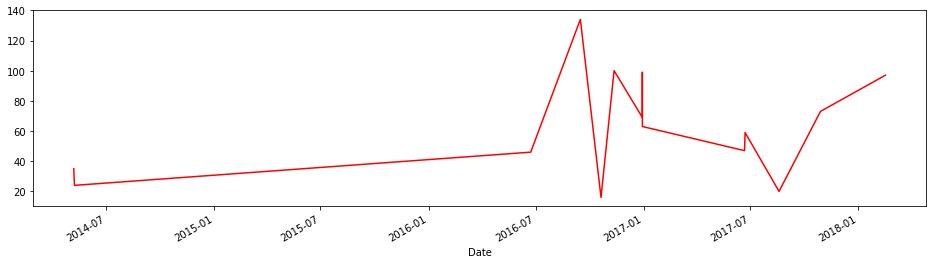

In [15]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

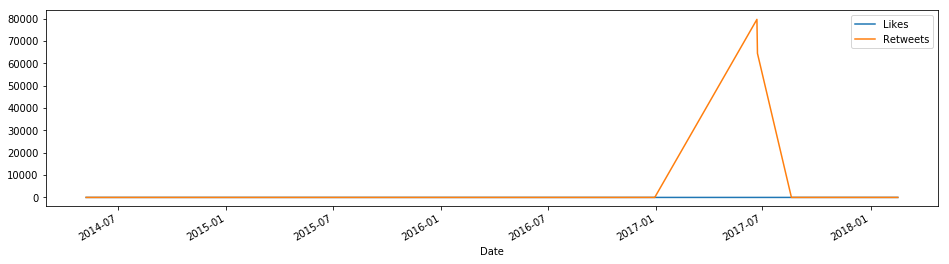

In [16]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [17]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Twitter for Android
* Twitter Web Client
* Facebook
* Twitter for iPad


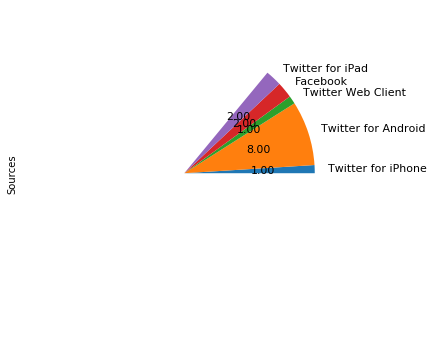

In [18]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [19]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [20]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,"RT @subashjayakuma1: #ValentinesDay , teaser o...",97,964360895345311745,2018-02-16 04:48:49,Twitter for iPhone,0,2,0
1,Bacardi official teaser😎 \n\nhttps://t.co/2VoM...,73,924311049037258759,2017-10-28 16:25:01,Twitter for Android,3,2,0
2,#Mersal everywhere 😍,20,898777643692179456,2017-08-19 05:24:23,Twitter for Android,1,1,0
3,RT @actorvijay: #Mersal 2nd Look !! https://t....,59,877837472058662915,2017-06-22 10:35:37,Twitter Web Client,0,64450,0
4,RT @actorvijay: #Mersal https://t.co/WXC052cGY9,47,877505050423083008,2017-06-21 12:34:41,Twitter for Android,0,79662,0
5,@PetaIndia then u bitches target bull fi8 happ...,63,814506425602871298,2016-12-29 16:20:39,Twitter for Android,0,0,0
6,"5000 ஆண்டுகால தமிழர் பண்பாட்டை, \n70 ஆண்டு இந்...",99,814494537666084864,2016-12-29 15:33:25,Twitter for Android,0,0,0
7,RT @mohan_itz: Happy to see the Unity....❤ \nW...,69,814493217286602752,2016-12-29 15:28:10,Twitter for Android,0,7,1
8,I am the only one who likes #showkali song mor...,100,797065009700466690,2016-11-11 13:14:41,Facebook,2,0,1
9,@thalapathyVFC 💪,16,789012093097828352,2016-10-20 07:55:16,Twitter for Android,0,0,0


In [21]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [22]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 21.428571428571427%
Percentage of neutral tweets: 71.42857142857143%
Percentage de negative tweets: 7.142857142857143%


In [26]:
tweet1 = extractor.user_timeline(id ='S Abishek', count = 1)


In [28]:
for tweet in tweet1:
    print(tweet.text)

RT @subashjayakuma1: #ValentinesDay , teaser of Vennilave Vennilave.....

https://t.co/HcVhKVedyB


In [30]:
# searching for tweets
tweets2 = tweepy.Cursor(extractor.search, q='Thala', lang = "English").items(10)

In [31]:
for tweet in tweets2:
    print(tweet.text)